In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas Keras tensorflow

In [ ]:
pip install tensorflow==2.2.0

In [ ]:
pip install matplotlib

# Importing libraries

In [68]:
import pandas as pd
import numpy as np
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load dataset

In [139]:
data = pd.read_csv("dataset/iris.csv")
data_entry = data.iloc[:, 0:4].values
data_class = data.iloc[:, 4].values

# Transforming labels into numerical values (Iris Setosa=0, Iris Versicolour=1, Iris Virginica=2)
label_encoder = LabelEncoder()
data_class = label_encoder.fit_transform(data_class)  # [0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2]

# Converts a class vector (integers) to binary class matrix.
data_class_dummy = np_utils.to_categorical(data_class)
# Iris Setosa =      1 0 0 
# Iris Versicolour = 0 1 0
# Iris Virginica =   0 0 1
#[[1. 0. 0.][0. 1. 0.][0. 0. 1.]]

class_names = ['setosa', 'versicolor', 'virginica']

# Split dataset into random train and test subsets

In [16]:
entry_train, entry_test, class_train, class_test = train_test_split(data_entry, data_class_dummy, test_size=0.25)

# Model configuration for training

In [17]:
# Sequential model.
classifier = Sequential()
# Connected NN layer
classifier.add(Dense(units=4, activation='relu', input_dim=4))
classifier.add(Dense(units=4, activation='relu'))
classifier.add(Dense(units=3, activation='softmax'))
# Configures the model for training
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Trains the model for a fixed number of epochs

In [18]:
classifier.fit(entry_train, class_train, batch_size=10, epochs=1000)

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.7539 - categorical_accuracy: 0.3482
Epoch 2/1000
12/12 [==============================] - 0s 682us/step - loss: 1.5640 - categorical_accuracy: 0.3482
Epoch 3/1000
12/12 [==============================] - 0s 900us/step - loss: 1.4114 - categorical_accuracy: 0.3482
Epoch 4/1000
12/12 [==============================] - 0s 641us/step - loss: 1.2849 - categorical_accuracy: 0.3482
Epoch 5/1000
12/12 [==============================] - 0s 654us/step - loss: 1.1930 - categorical_accuracy: 0.3482
Epoch 6/1000
12/12 [==============================] - 0s 699us/step - loss: 1.1296 - categorical_accuracy: 0.3482
Epoch 7/1000
12/12 [==============================] - 0s 566us/step - loss: 1.0910 - categorical_accuracy: 0.3482
Epoch 8/1000
12/12 [==============================] - 0s 701us/step - loss: 1.0601 - categorical_accuracy: 0.3482
Epoch 9/1000
12/12 [==============================] - 0s 606us/step - loss: 1.0361 - categ

# Evaluation of the neural network with the test data

In [140]:
result = classifier.evaluate(entry_test, class_test)

2/2 [==============================] - 0s 971us/step - loss: 0.0935 - categorical_accuracy: 0.9474


In [141]:
provisions = classifier.predict(entry_test)
provisions = provisions > 0.5
#print(provisions)

# Matrix of confusion to see which classes are erring.

In [142]:
class_test_2 = [np.argmax(c) for c in class_test]
provisions_2 = [np.argmax(p) for p in provisions]

matrix = confusion_matrix(provisions_2, class_test_2)

In [143]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12  0  0]
 [ 0 10  1]
 [ 0  1 14]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.91 0.09]
 [0.   0.07 0.93]]


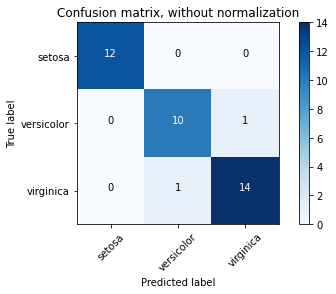

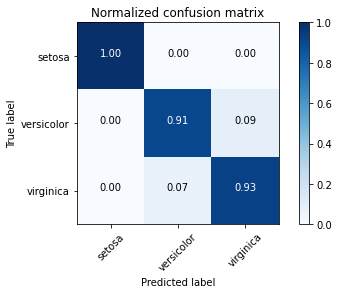

In [144]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=class_names, title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

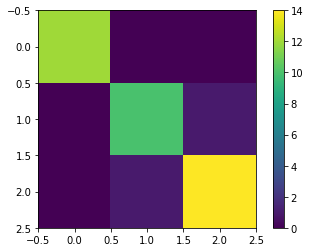

In [136]:
plt.imshow(matrix)
plt.colorbar()
plt.show()